## Table of Contents
1. [Create Data](#Create-Data)
2. [Solve Direclty](#Solve-Directly)
3. [Gradient Descent](#Gradient-Descent)
4. [Stochastic Gradient Descent](#Stochastic-Gradient-Descent-(SGD))
5. [Mini-batch Gradient Descent](#Mini-batch-Gradient-Descent)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Create Data

In [2]:
# generate random data with some noise

X = 2 * np.random.rand(100, 1)
y = 8 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

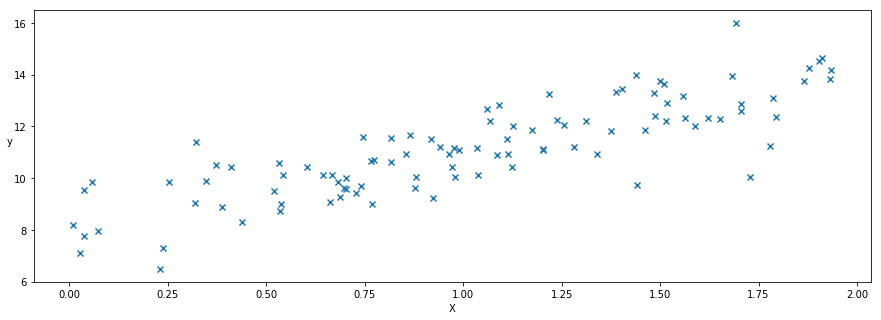

In [3]:
# scatter plot to see the relation between X and y
plt.figure(figsize=(15,5))
plt.scatter(X, y, marker='x')
plt.xlabel('X')
plt.ylabel('y', rotation=0)

## Solve Directly

In [4]:
# adding bais usint to every vector in X
X_b = np.c_[np.ones_like(X), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# values are very close to are thetas 8 and 3
theta

array([[8.12232869],
       [2.93214211]])

## Gradient Descent
### Cost Function & Gradients

Below mentioned __Cost Function__ which stands for __Mean Squared Error(MSE)__ is for __Linear Regression__ and __Gradient__ is derived from the it.

Cost

$$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$

In [5]:
def cal_cost(theta, X, y):
    '''
    Calculates the cost for given X and y. 
    
    
    Parameters
    ----------
    theta: Vector of thetas
    X: Row of X's
    y: Actual y's
    
    Returns
    -------
    Calculated cost
    '''
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/2 * m) * np.sum(np.square(predictions - y))
    
    return cost

In [6]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    '''
    Parameters
    ----------
    X: Matrix of X with bais units added to every vector of X
    y: Vector of y
    theta: Vector initialized randomly
    learning_rate: learning rate that will be used as step size
    iterations = Number of iterations
    
    Returns
    -------
    The final theta vector, array of cost and theta history over no of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
        predictions = np.dot(X, theta)
        
        theta = theta - (1/m) * learning_rate * (X.T.dot((predictions - y)))
        theta_history[i, :] = theta.T
        cost_history[i] = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

In [7]:
# Using gradient descent to find out the thetas between our X and y relation

lr = 0.03
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

print('{:<10}{:.3f}'.format('Theta0:',theta[0][0]))
print('{:<10}{:.3f}'.format('Theta1:',theta[1][0]))
print('{:<10}{:.3f}'.format('Cost/MSE:',cost_history[-1]))

Theta0:   8.041
Theta1:   3.001
Cost/MSE: 5072.927


Text(0, 0.5, 'y')

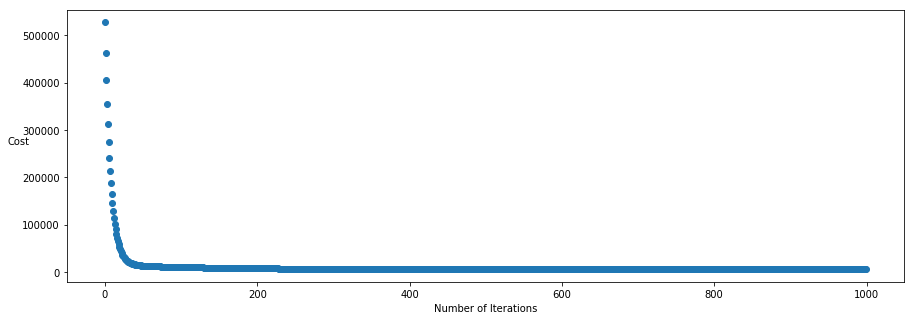

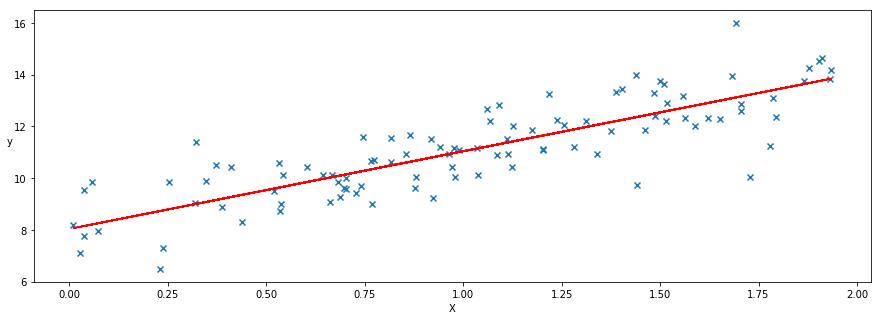

In [8]:
# plotting the cost history vs number of iterations

plt.figure(figsize=(15,5))
plt.scatter(range(n_iter), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost', rotation=0)

# plot prediction line

plt.figure(figsize=(15,5))
plt.scatter(X, y, marker='x')
plt.plot(X, np.dot(X_b, theta), 'red')
plt.xlabel('X')
plt.ylabel('y', rotation=0)

## Stochastic Gradient Descent (SGD)

In [9]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1):
    '''
    Parameters
    ----------
    X: Matrix of X with bais units added to every vector of X
    y: Vector of y
    theta: Vector initialized randomly
    learning_rate: learning rate that will be used as step size
    iterations = Number of iterations
    
    Returns
    -------
    The final theta vector, array of cost and theta history over no of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
        cost_per_iteration = .0
        for j in range(m):
            X_rand_idx = np.random.randint(m)
            
            X_inner = X[X_rand_idx].reshape(1, X.shape[1])
            y_inner = y[X_rand_idx].reshape(1, 1)
            
            predictions = np.dot(X_inner, theta)
            
            theta = theta - (1/m) * learning_rate * (X_inner.T.dot((predictions - y_inner)))
            cost_per_iteration += cal_cost(theta, X_inner, y_inner)
        cost_history[i] = cost_per_iteration
        
    return theta, cost_history, theta_history

In [10]:
# Using stochastic gradient descent to find out the thetas between our X and y relation

lr = 0.5
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = stochastic_gradient_descent(X_b, y, theta, lr, n_iter)

print('{:<10}{:.3f}'.format('Theta0:',theta[0][0]))
print('{:<10}{:.3f}'.format('Theta1:',theta[1][0]))
print('{:<10}{:.3f}'.format('Cost/MSE:',cost_history[-1]))

Theta0:   8.166
Theta1:   2.975
Cost/MSE: 52.294


Text(0, 0.5, 'y')

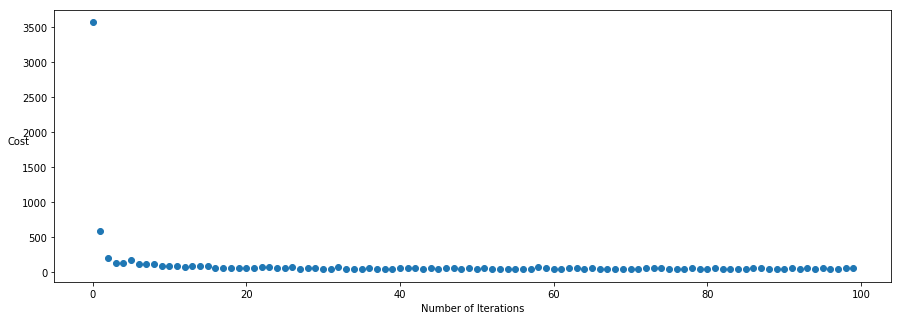

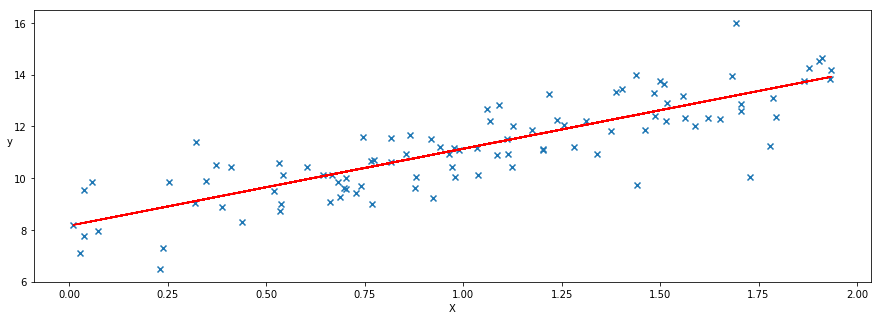

In [11]:
# plotting the cost history vs number of iterations

plt.figure(figsize=(15,5))
plt.scatter(range(n_iter), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost', rotation=0)

# plot prediction line

plt.figure(figsize=(15,5))
plt.scatter(X, y, marker='x')
plt.plot(X, np.dot(X_b, theta), 'red')
plt.xlabel('X')
plt.ylabel('y', rotation=0)

## Mini-batch Gradient Descent

In [12]:
def mini_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1, batch_size=16):
    '''
    Parameters
    ----------
    X: Matrix of X with bais units added to every vector of X
    y: Vector of y
    theta: Vector initialized randomly
    learning_rate: learning rate that will be used as step size
    iterations = Number of iterations
    
    Returns
    -------
    The final theta vector, array of cost and theta history over no of iterations
    '''
    
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for i in range(iterations):
        cost_per_iteration = .0
        rand_indicies = np.random.permutation(m)
        
        X = X[rand_indicies]
        y = y[rand_indicies]        
        
        for j in range(0, m, batch_size):
            X_inner = X[i: i+batch_size]
            y_inner = y[i: i+batch_size]
            
            predictions = np.dot(X_inner, theta)
            
            theta = theta - (1/m) * learning_rate * (X_inner.T.dot((predictions - y_inner)))
            cost_per_iteration += cal_cost(theta, X_inner, y_inner)
        cost_history[i] = cost_per_iteration
        
    return theta, cost_history, theta_history

In [13]:
# Using mini batch gradient descent to find out the thetas between our X and y relation
lr = 0.5
n_iter = 20
batch_size = 8

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = mini_gradient_descent(X_b, y, theta, lr, n_iter, batch_size=1)

print('{:<10}{:.3f}'.format('Theta0:',theta[0][0]))
print('{:<10}{:.3f}'.format('Theta1:',theta[1][0]))
print('{:<10}{:.3f}'.format('Cost/MSE:',cost_history[-1]))

Theta0:   6.074
Theta1:   4.338
Cost/MSE: 53.609


Text(0, 0.5, 'y')

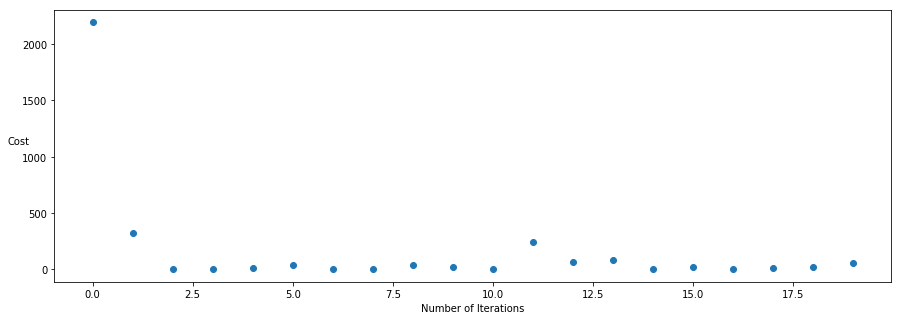

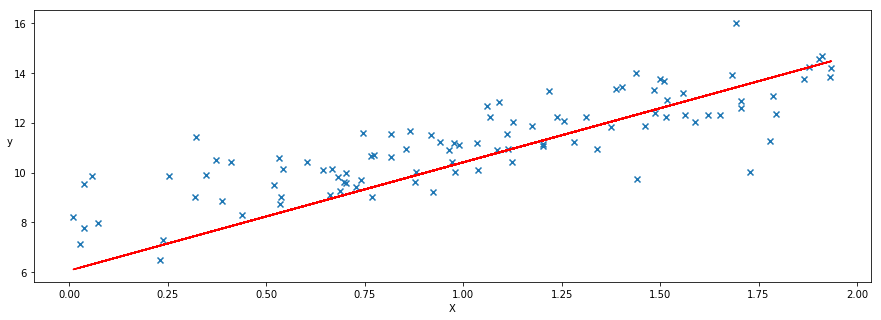

In [14]:
# plotting the cost history vs number of iterations

plt.figure(figsize=(15,5))
plt.scatter(range(n_iter), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost', rotation=0)

# plot prediction line

plt.figure(figsize=(15,5))
plt.scatter(X, y, marker='x')
plt.plot(X, np.dot(X_b, theta), 'red')
plt.xlabel('X')
plt.ylabel('y', rotation=0)